## Regression using Neural-Network, Keras API
* We can easily fit the regression data with Keras sequential model and predict the test data
    * how to fit regression data with the Keras neural network API
    * using KerasRegressor wrapper and the 
    * Keras sequential model itself

1. Preparing data
2. Defining the model
3. Fitting with KerasRegressor (accuracy check and visualizing the results)
4. Fitting with the sequential model (accuracy check and visualizing the results)

In [7]:
#importing libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

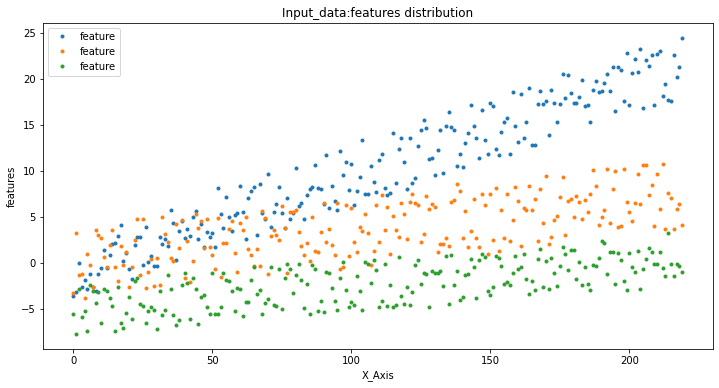

In [8]:
#Generate/Preparing data
random.seed(123)
def CreateDataset(N):
    x1,x2,x3,y = [],[],[],[]
    for i in range(N):
        xx1 = i/10+random.uniform(-4,3)
        xx2 = i/30+random.uniform(-4,4)
        xx3 = i/40+random.uniform(-3,3)-5
        yy = (xx1+xx2+xx3/2)/3
        x1.append([xx1])
        x2.append([xx2])
        x3.append([xx3])
        y.append([yy])
    return np.hstack([x1,x2,x3]), np.array(y)

N = 220
features,label = CreateDataset(N)
x_axis = range(N)

plt.figure(figsize=(12,6))
plt.plot(x_axis, features, 'o', label="feature", markersize=3)
plt.xlabel('X_Axis')
plt.ylabel('features')
plt.title('Input_data:features distribution')
plt.legend()
plt.show()
 

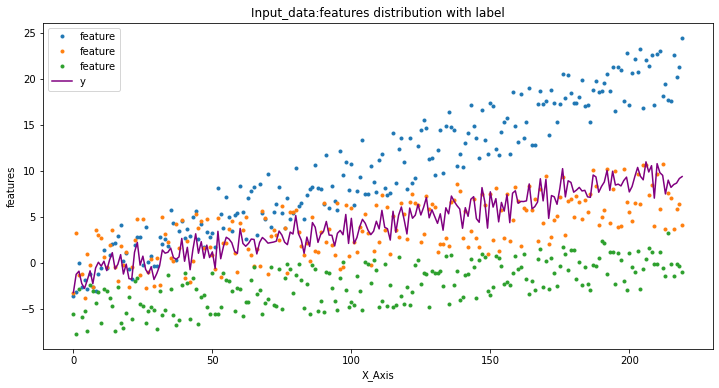

In [9]:
plt.figure(figsize=(12,6))
plt.plot(x_axis, features, 'o', label="feature", markersize=3)
plt.plot(x_axis, label, lw=1.5, color="purple", label="y")
plt.xlabel('X_Axis')
plt.ylabel('features')
plt.title('Input_data:features distribution with label')
plt.legend()
plt.show()
 

In [10]:
features.shape

(220, 3)

In [11]:
label.shape

(220, 1)

#### Purple-line is y output, and the remaining dots are features for x input.


In [12]:
#Defining the model
#Build a keras sequential model to use in KerasRegressor wrapper.

def BuildModel():
    model = Sequential()
    model.add(Dense(128, input_dim=3,activation='relu')) 
    model.add(Dense(32, activation='relu')) 
    model.add(Dense(8,activation='relu')) 
    model.add(Dense(1,activation='linear'))
    model.compile(loss="mean_squared_error", optimizer="adam")   
    return model
model=BuildModel()
BuildModel().summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 4,913
Trainable params: 4,913
Non-trainable params: 0
_________________________________________________________________


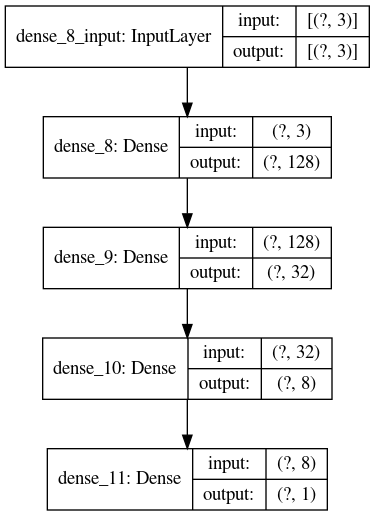

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

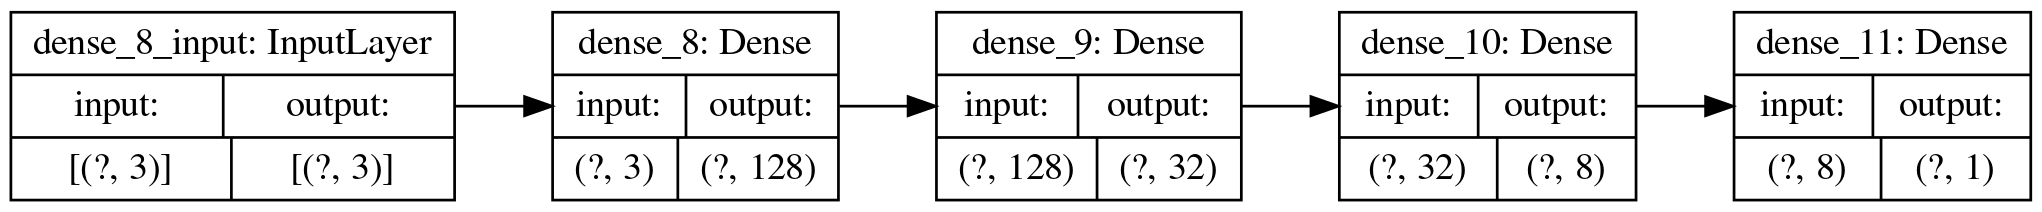

In [14]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    #show_dtype=True,
    show_layer_names=True,
    rankdir="LR", #'TB' creates a vertical plot; 'LR' creates a horizontal plot.
    expand_nested=True,
    dpi=196,
)

74/74 [==============================] - 0s 2ms/step - loss: 14.2237
mse of keras_regrerssor: 0.24122192691754848


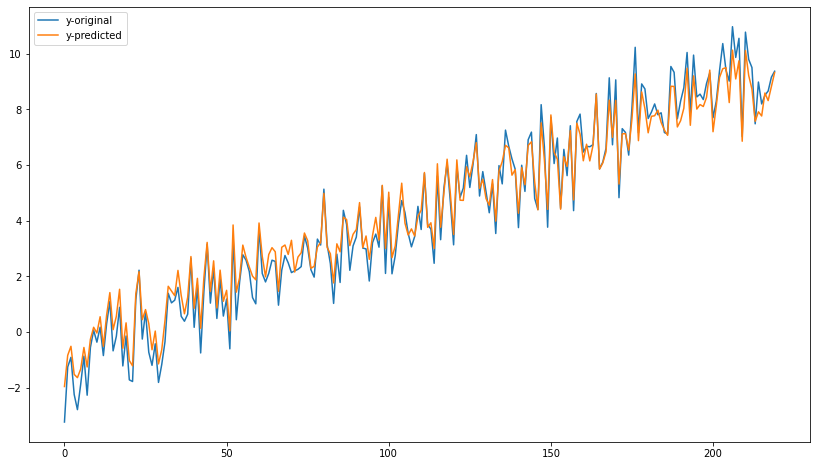

In [17]:
#Fitting with KerasRegressor
#Include the above model into KerasRegressor and fit model with x and y data. Then, we can predict x data.
regressor = KerasRegressor(build_fn=BuildModel,nb_epoch=100,batch_size=3)
regressor.fit(features,label) 

y_pred = regressor.predict(features)
 
# check the mean_squared_error
mse_kr = mean_squared_error(label, y_pred)
print('mse of keras_regrerssor:',mse_kr)
 
#plot the results.
plt.figure(figsize=(14,8))
plt.plot(label, label="y-original")
plt.plot(y_pred, label="y-predicted")
plt.legend()
plt.show()

In [18]:
#Fitting with keras sequential model
#Model without a wrapper

model = BuildModel()
model.fit(features, label, epochs=80, verbose=1, shuffle=False)

Epoch 1/80
7/7 [==============================] - 0s 2ms/step - loss: 12.7416
Epoch 2/80
7/7 [==============================] - 0s 2ms/step - loss: 3.6399
Epoch 3/80
7/7 [==============================] - 0s 2ms/step - loss: 0.7330
Epoch 4/80
7/7 [==============================] - 0s 3ms/step - loss: 1.1478
Epoch 5/80
7/7 [==============================] - 0s 2ms/step - loss: 0.6699
Epoch 6/80
7/7 [==============================] - 0s 2ms/step - loss: 0.3756
Epoch 7/80
7/7 [==============================] - 0s 2ms/step - loss: 0.1138
Epoch 8/80
7/7 [==============================] - 0s 2ms/step - loss: 0.1096
Epoch 9/80
7/7 [==============================] - 0s 2ms/step - loss: 0.0570
Epoch 10/80
7/7 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 11/80
7/7 [==============================] - 0s 3ms/step - loss: 0.0406
Epoch 12/80
7/7 [==============================] - 0s 3ms/step - loss: 0.0259
Epoch 13/80
7/7 [==============================] - 0s 2ms/step - loss: 0

mse of keras_sequential/NN_model: 0.0005425094894008377


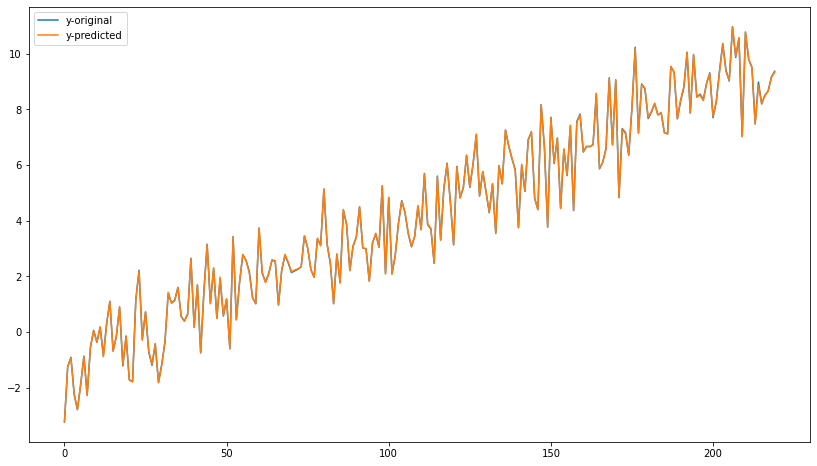

In [21]:
#prediction
y_model = model.predict(features)

#check a mean_squared_error
mse_model=mean_squared_error(label, y_model)
print('mse of keras_sequential/NN_model:',mse_model)
 
#plot the results
plt.figure(figsize=(14,8))
plt.plot(label, label="y-original")
plt.plot(y_model, label="y-predicted")
plt.legend()
plt.show()
#

## Multi-output Regression using Keras Sequential Model
#### - Multi-output regression data contains more than one output value for a given input data

1. Preparing the data
2. Defining the model
3. Predicting and visualizing the result

In [22]:
#import libraries
from keras.models import Sequential
from keras.layers import Dense
from numpy import array
from numpy.random import uniform
from numpy import hstack
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

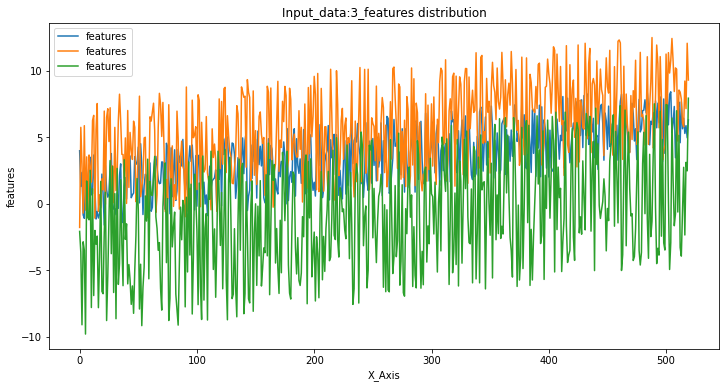

In [23]:
#preparing the data
def create_data(n):
    x1 = array([i/100+uniform(-2,4) for i in range(n)]).reshape(n,1)
    x2 = array([i/100+uniform(-4,6)+2 for i in range(n)]).reshape(n,1)
    x3 = array([i/100+uniform(-7,6)-3 for i in range(n)]).reshape(n,1)
    
    y1= [x1[i]-x2[i]+x3[i]+uniform(-3,3) for i in range(n)]
    y2= [x1[i]+x2[i]-x3[i]+5+uniform(-2,4) for i in range(n)]
    
    X = hstack((x1, x2, x3))
    Y = hstack((y1, y2))
    return X, Y

n=520
x_features, y_label = create_data(n)
xaxis=range(n)

#plotting x_features
plt.figure(figsize=(12,6))
plt.plot(xaxis, x_features, label="features", markersize=3)
plt.xlabel('X_Axis')
plt.ylabel('features')
plt.title('Input_data:3_features distribution')
plt.legend()
plt.show()

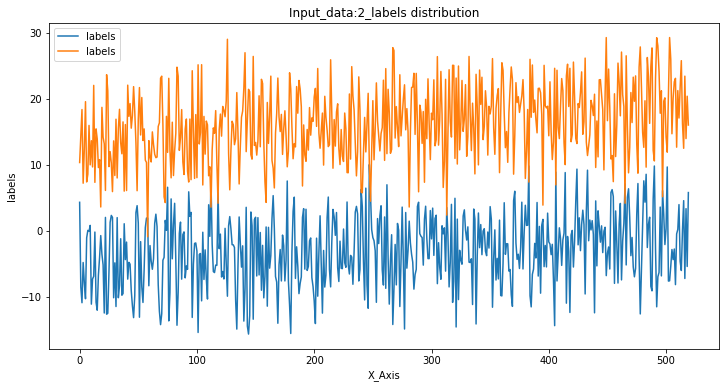

In [24]:
#plotting y_labels
plt.figure(figsize=(12,6))
plt.plot(xaxis, y_label, label="labels", markersize=3)
plt.xlabel('X_Axis')
plt.ylabel('labels')
plt.title('Input_data:2_labels distribution')
plt.legend()
plt.show()

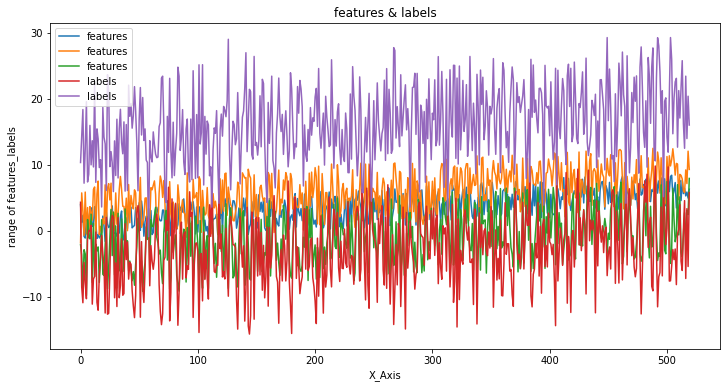

In [25]:
#plotting x_features
plt.figure(figsize=(12,6))
plt.plot(xaxis, x_features, label="features", markersize=3)
plt.plot(xaxis, y_label, label="labels", markersize=2)
plt.xlabel('X_Axis')
plt.ylabel('range of features_labels')
plt.title('features & labels')
plt.legend()
plt.show()

In [28]:
X=x_features
Y=y_label

print("X:", X.shape, "Y:", Y.shape)
 
in_dim = X.shape[1]
out_dim = Y.shape[1]

xtrain, xtest, ytrain, ytest=train_test_split(X, Y, test_size=0.15)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

X: (520, 3) Y: (520, 2)
(442, 3)
(442, 2)
(78, 3)
(78, 2)


In [29]:
import tensorflow as tf
model = Sequential()
model.add(Dense(128, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='linear'))
#model.add(Dense(2))
model.compile(optimizer='adam', loss=tf.keras.losses.LogCosh(), metrics='mse')
 
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_33 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_34 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 34        
Total params: 5,202
Trainable params: 5,202
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(xtrain, ytrain, epochs=100, batch_size=12, verbose=1)


Epoch 1/100
37/37 [==============================] - 0s 2ms/step - loss: 7.1419 - mse: 95.4537
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 1.9094 - mse: 9.9005
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 1.2266 - mse: 4.8957
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 1.1285 - mse: 4.2373
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 1.0834 - mse: 3.9636
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 1.0573 - mse: 3.7874
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 1.0504 - mse: 3.7319
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 1.0659 - mse: 3.8725
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 1.0347 - mse: 3.6757
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 1.0136 - mse: 3.5636
Epoch 11/100
37/37 [==============================] - 0s 2

37/37 [==============================] - 0s 2ms/step - loss: 0.8596 - mse: 2.7576
Epoch 88/100
37/37 [==============================] - 0s 2ms/step - loss: 0.8705 - mse: 2.7915
Epoch 89/100
37/37 [==============================] - 0s 2ms/step - loss: 0.8813 - mse: 2.8444
Epoch 90/100
37/37 [==============================] - 0s 2ms/step - loss: 0.8719 - mse: 2.8150
Epoch 91/100
37/37 [==============================] - 0s 2ms/step - loss: 0.8588 - mse: 2.7635
Epoch 92/100
37/37 [==============================] - 0s 2ms/step - loss: 0.8743 - mse: 2.8593
Epoch 93/100
37/37 [==============================] - 0s 2ms/step - loss: 0.8742 - mse: 2.8074
Epoch 94/100
37/37 [==============================] - 0s 2ms/step - loss: 0.8807 - mse: 2.8638
Epoch 95/100
37/37 [==============================] - 0s 2ms/step - loss: 0.8827 - mse: 2.8695
Epoch 96/100
37/37 [==============================] - 0s 2ms/step - loss: 0.8744 - mse: 2.8320
Epoch 97/100
37/37 [==============================] - 0s 2ms/st

In [31]:
#Predicting and visualizing the result
ypred = model.predict(xtest)

In [32]:
ypred.shape

(78, 2)

In [33]:
print("y1 MSE:%.4f" % mean_squared_error(ytest[:,0], ypred[:,0])) 
print("y2 MSE:%.4f" % mean_squared_error(ytest[:,1], ypred[:,1]))

mse_multioutput= mean_squared_error(ytest, ypred)
print('mse_multioutput:', mse_multioutput)

y1 MSE:3.4609
y2 MSE:3.5591
mse_multioutput: 3.5100208732973166


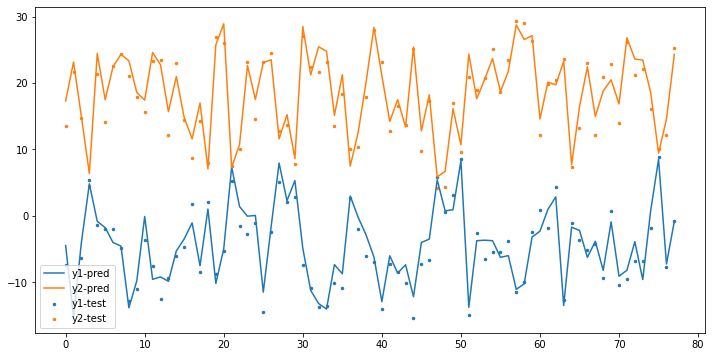

In [35]:
#plotting ground_truth vs predictions
x_axis = range(len(xtest))

plt.figure(figsize=(12,6))
plt.scatter(x_axis, ytest[:,0],  s=6, label="y1-test")
plt.plot(x_axis, ypred[:,0], label="y1-pred")
plt.scatter(x_axis, ytest[:,1],  s=6, label="y2-test")
plt.plot(x_axis, ypred[:,1], label="y2-pred")
plt.legend()
plt.show()

### Take-home-points:

* Use the ADAM optimizer
* ReLU and it's types (i.e. LeakyReLu, PReLu, etc... are the best nonlinearity (activation function)
* DO add a bias in every layer
* Do NOT use an activation function at output layer
* Whiten (normalize) input data
* Scale input data in a way that reasonably preserves its dynamic range